### Reference 

 http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Quote from original paper:

*In the comparison of chest X-rays presenting as pneumonia versus normal, we achieved an accuracy of 92.8%, with* 

*a sensitivity of 93.2% and a specificity of 90.1%. The area under the ROC curve for detection of pneumonia from* 

*normal was 96.8%.*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [5]:
data_dir = Path("/storage/data/chestxray")
!mkdir -p {data_dir}
!unzip /storage/chest_xray.zip -d {data_dir}

Archive:  /storage/chest_xray.zip
  inflating: /storage/data/chestxray/chest_xray/.DS_Store  
   creating: /storage/data/chestxray/chest_xray/model/
   creating: /storage/data/chestxray/chest_xray/train/
  inflating: /storage/data/chestxray/chest_xray/train/.DS_Store  
   creating: /storage/data/chestxray/chest_xray/train/NORMAL/
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0115-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0117-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0119-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0122-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0125-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0127-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0128-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0129-0001.jpeg  
  inflating: /storag

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0273-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0274-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0275-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0276-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0277-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0278-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0279-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0280-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0282-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0283-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0285-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0286-0001.jpeg  
  inflating: /storage/data/c

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0394-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0395-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0399-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0400-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0401-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0403-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0404-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0405-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0408-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0409-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0410-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0411-0001.jpeg  
  inflating: /storage/data/c

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0499-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0499-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0499-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0500-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0501-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0501-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0501-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0502-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0503-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0504-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0505-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0505-0001-0001.jpeg  
  i

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0565-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0566-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0568-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0569-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0570-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0571-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0574-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0575-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0577-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0578-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0579-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0580-0001.jpeg  
  inflating: /storage/data/c

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0655-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0656-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0656-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0657-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0658-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0659-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0660-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0660-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0660-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0661-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/IM-0662-0001.jpeg  
  inflat

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0384-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0385-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0386-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0388-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0389-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0390-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0391-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0392-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0393-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0394-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0395-0001.jpeg  
  inflating: /storage

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0502-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0503-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0506-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0507-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0508-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0509-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0511-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0512-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0513-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0515-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0516-0001.jpeg  
  inflating: /storage

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0629-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0630-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0633-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0634-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0635-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0636-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0637-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0640-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0641-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0642-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0643-0001.jpeg  
  inflating: /storage

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0810-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0811-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0812-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0814-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0815-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0816-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0818-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0818-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0819-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0820-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0821-0001.jpeg  
  inflating: /st

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0911-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0912-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0913-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0914-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0915-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0917-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0918-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0919-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0922-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0923-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-0924-0001.jpeg  
  inflating: /storage

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1022-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1023-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1024-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1025-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1026-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1027-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1028-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1030-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1033-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1035-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1037-0001.jpeg  
  inflating: /storage

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1144-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1145-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1147-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1148-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1149-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1150-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1151-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1152-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1152-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1152-0001-0002.jpeg  
  infl

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1260-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1261-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1262-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1264-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1266-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1266-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1266-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1267-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1269-0001.jpeg  
 

  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1365-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1371-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1376-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1379-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1385-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1396-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1400-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1401-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1406-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1412-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/NORMAL/NORMAL2-IM-1419-0001.jpeg  
  inflating: /storage

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1038_bacteria_2972.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1038_virus_1733.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1039_bacteria_2973.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person104_virus_191.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1040_bacteria_2974.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1040_virus_1735.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1041_bacteria_2975.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1041_virus_1736.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1042_virus_1737.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1043_bacteria_2977.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNE

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1085_bacteria_3025.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1085_virus_1797.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1086_bacteria_3026.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1086_virus_1798.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1087_bacteria_3027.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1087_virus_1799.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1088_bacteria_3028.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1089_bacteria_3029.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1089_virus_1808.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/P

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1135_bacteria_3077.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1136_bacteria_3078.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1137_virus_1876.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1138_bacteria_3080.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1138_virus_1877.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1138_virus_1879.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1139_bacteria_3081.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1139_bacteria_3082.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1139_virus_1882.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person114_virus_217.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNE

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1175_virus_1981.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1176_bacteria_3123.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1176_bacteria_3124.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1176_virus_1996.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1176_virus_1997.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1176_virus_1998.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1177_bacteria_3125.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1177_virus_1999.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1177_virus_2000.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1177_virus_2001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMON

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1219_virus_2067.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person122_virus_229.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1220_bacteria_3173.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1220_bacteria_3174.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1220_virus_2068.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1222_bacteria_3177.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1222_virus_2071.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1223_bacteria_3178.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1223_virus_2073.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1224_virus_2074.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMO

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person126_virus_255.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1260_bacteria_3218.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1260_virus_2140.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1261_bacteria_3219.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1261_virus_2145.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1261_virus_2147.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1261_virus_2148.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1262_bacteria_3220.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1263_bacteria_3221.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1264_bacteria_3222.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNE

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1306_bacteria_3274.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1306_bacteria_3275.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1306_bacteria_3276.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1306_bacteria_3277.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1306_virus_2249.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1307_bacteria_3278.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1307_virus_2251.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1308_bacteria_3280.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1308_bacteria_3283.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1308_bacteria_3285.jpeg  
  inflating: /storage/data/chestxray/chest_xra

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person133_virus_267.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1331_bacteria_3380.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1331_virus_2299.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1332_virus_2300.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1333_bacteria_3383.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1333_bacteria_3384.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1333_bacteria_3385.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1333_bacteria_3386.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1333_virus_2301.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1336_virus_2306.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNE

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1365_virus_2348.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1366_bacteria_3490.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1366_virus_2349.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1367_virus_2351.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1368_virus_2352.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1368_virus_2353.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1368_virus_2354.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1369_virus_2355.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1369_virus_2356.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person137_virus_281.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/perso

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1408_virus_2411.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1409_bacteria_3583.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1409_bacteria_3585.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1409_virus_2413.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person141_virus_287.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1411_bacteria_3591.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1411_bacteria_3593.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1411_bacteria_3598.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1411_bacteria_3599.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1411_bacteria_3601.jpeg  
  inflating: /storage/data/chestxray/chest_xray/tra

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1446_bacteria_3739.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1446_bacteria_3740.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1447_bacteria_3741.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1448_virus_2468.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1449_bacteria_3743.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1449_bacteria_3745.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1449_bacteria_3746.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1449_bacteria_3747.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1449_virus_2474.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1449_virus_2476.jpeg  
  inflating: /storage/data/chestxray/chest_xray/t

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1480_bacteria_3858.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1480_bacteria_3859.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1480_virus_2566.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3862.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3863.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3864.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3865.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3866.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3867.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1481_bacteria_3868.jpeg  
  inflating: /storage/data/chestxray/chest_

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1507_bacteria_3944.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1507_bacteria_3945.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1507_bacteria_3946.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1507_bacteria_3947.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1507_bacteria_3948.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1508_bacteria_3949.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1509_bacteria_3951.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1509_virus_2621.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person151_virus_301.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person151_virus_302.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1546_virus_2687.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1547_virus_2688.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1548_bacteria_4048.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1548_virus_2689.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1549_bacteria_4050.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1549_virus_2690.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person155_virus_307.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1550_bacteria_4051.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1550_virus_2691.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1551_bacteria_4053.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMO

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1595_virus_2771.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1596_bacteria_4184.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4187.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4188.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4189.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4190.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4191.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4193.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1597_bacteria_4194.jpeg  
  inflating: /storage/data/chestxray/chest_

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1640_bacteria_4348.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1641_bacteria_4350.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1642_bacteria_4352.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1642_bacteria_4353.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1643_bacteria_4354.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1644_bacteria_4356.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1644_bacteria_4357.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1644_bacteria_4358.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1644_bacteria_4360.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1644_bacteria_4361.jpeg  
  inflating: /storage/data/chestxray/che

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1702_bacteria_4509.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1702_bacteria_4510.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1702_bacteria_4511.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1705_bacteria_4515.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1706_bacteria_4516.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1707_bacteria_4520.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1708_bacteria_4521.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1709_bacteria_4522.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1709_bacteria_4523.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1709_bacteria_4524.jpeg  
  inflating: /storage/data/chestxray/che

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1843_bacteria_4710.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1847_bacteria_4716.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1848_bacteria_4719.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1850_bacteria_4721.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1851_bacteria_4722.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1852_bacteria_4724.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1855_bacteria_4727.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1857_bacteria_4729.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1858_bacteria_4730.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1859_bacteria_4731.jpeg  
  inflating: /storage/data/chestxray/che

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1949_bacteria_4880.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1950_bacteria_4881.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1951_bacteria_4882.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1952_bacteria_4883.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person1954_bacteria_4886.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person2_bacteria_3.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person2_bacteria_4.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person20_bacteria_64.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person20_bacteria_66.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person20_bacteria_67.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1208.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1209.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1210.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1212.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1214.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1215.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_bacteria_1216.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person258_virus_539.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person259_bacteria_1217.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person259_bacteria_1219.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1301.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1302.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1303.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1304.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1305.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1306.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_bacteria_1307.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person277_virus_571.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person278_bacteria_1309.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person278_bacteria_1311.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person297_virus_614.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_bacteria_1408.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_bacteria_1409.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_bacteria_1410.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_bacteria_1411.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_bacteria_1412.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_bacteria_1413.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_virus_617.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person298_virus_618.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person299_bacteria_1414.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONI

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person315_bacteria_1464.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person315_bacteria_1465.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person315_bacteria_1466.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person315_bacteria_1467.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person315_bacteria_1468.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person316_bacteria_1469.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person316_bacteria_1470.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person316_virus_641.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person317_bacteria_1471.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person317_bacteria_1473.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person332_virus_685.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person333_bacteria_1539.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person333_bacteria_1540.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person333_virus_688.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person334_bacteria_1541.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person334_bacteria_1542.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person334_bacteria_1544.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person334_bacteria_1545.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person334_virus_689.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person335_virus_690.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/pe

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person354_bacteria_1635.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person354_virus_729.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person355_bacteria_1637.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person355_virus_730.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person355_virus_731.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person356_bacteria_1638.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person356_virus_733.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person357_bacteria_1639.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person357_bacteria_1640.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person357_virus_734.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person376_bacteria_1715.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person376_bacteria_1716.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person376_virus_759.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person377_bacteria_1717.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person377_bacteria_1718.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person377_virus_760.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person378_virus_761.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person379_bacteria_1721.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person379_bacteria_1722.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person379_virus_762.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/pe

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person400_virus_794.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person401_bacteria_1808.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person401_virus_795.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person401_virus_797.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person401_virus_798.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person402_bacteria_1809.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person402_bacteria_1810.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person402_bacteria_1811.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person402_bacteria_1812.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person402_bacteria_1813.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/pe

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person426_virus_873.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person427_bacteria_1864.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person427_bacteria_1865.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person427_bacteria_1866.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person427_bacteria_1867.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person427_bacteria_1868.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person427_virus_875.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person428_bacteria_1869.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person428_virus_876.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person429_bacteria_1870.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONI

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person445_virus_916.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person445_virus_917.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person445_virus_918.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person445_virus_919.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person446_bacteria_1931.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person446_virus_920.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person447_bacteria_1932.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person447_virus_921.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person447_virus_921_1.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person448_bacteria_1933.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person448_ba

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person47_bacteria_229.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_1996.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_1998.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_1999.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_2000.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_2001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_2002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_bacteria_2003.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person470_virus_966.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person471_bacteria_2004.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PN

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person490_virus_996.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_bacteria_2071.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_bacteria_2073.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_bacteria_2075.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_bacteria_2080.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_bacteria_2081.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_bacteria_2082.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person491_virus_997.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person492_bacteria_2083.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person492_bacteria_2084.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEU

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_242.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_243.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_244.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_245.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_246.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_247.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person51_bacteria_248.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person510_bacteria_2147.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person510_bacteria_2148.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person510_bacteria_2149.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person534_bacteria_2252.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person534_bacteria_2253.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person534_bacteria_2254.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person534_virus_1061.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person535_bacteria_2255.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person535_bacteria_2256.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person535_virus_1062.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person536_bacteria_2257.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person536_bacteria_2258.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person536_bacteria_2259.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PN

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person552_virus_1092.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person553_bacteria_2316.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person553_bacteria_2317.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person553_virus_1093.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person554_bacteria_2321.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person554_bacteria_2322.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person554_bacteria_2323.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person554_virus_1094.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person555_bacteria_2325.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUM

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person58_bacteria_276.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person58_bacteria_277.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person58_bacteria_278.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person580_bacteria_2387.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person580_bacteria_2388.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person580_bacteria_2389.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person581_bacteria_2390.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person581_bacteria_2392.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person581_bacteria_2393.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person581_bacteria_2394.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PN

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person603_bacteria_2461.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person603_virus_1164.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person604_bacteria_2462.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person604_bacteria_2463.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person604_virus_1165.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person605_bacteria_2464.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person605_bacteria_2465.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person605_bacteria_2466.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person605_bacteria_2467.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person605_bacteria_2468.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PN

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person630_bacteria_2514.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person630_bacteria_2515.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person630_bacteria_2516.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person630_virus_1209.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person632_bacteria_2520.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person632_bacteria_2521.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person632_virus_1211.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person633_bacteria_2522.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person633_virus_1213.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person634_bacteria_2525.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUM

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person67_bacteria_332.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person67_bacteria_333.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person67_bacteria_334.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person670_bacteria_2563.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person670_virus_1256.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person670_virus_1259.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person671_bacteria_2564.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person671_virus_1260.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person672_bacteria_2565.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person672_virus_1261.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/pers

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person718_virus_1316.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person719_bacteria_2621.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person719_virus_1338.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person72_bacteria_352.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person72_bacteria_353.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person72_bacteria_354.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person720_bacteria_2622.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person720_virus_1339.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person721_bacteria_2623.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person721_virus_1340.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/pers

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person759_bacteria_2663.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person759_virus_1387.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person76_bacteria_370.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person76_bacteria_371.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person76_bacteria_372.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person760_bacteria_2664.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person760_virus_1388.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person761_bacteria_2665.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person761_virus_1389.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person762_virus_1390.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/pers

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person813_bacteria_2723.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person813_bacteria_2724.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person813_virus_1449.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person814_bacteria_2725.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person815_bacteria_2726.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person816_bacteria_2727.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person817_bacteria_2728.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person818_bacteria_2729.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person819_bacteria_2730.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person819_virus_1455.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PN

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person872_bacteria_2795.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person873_bacteria_2796.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person874_bacteria_2797.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person875_bacteria_2798.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person876_bacteria_2799.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person877_bacteria_2800.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person877_virus_1525.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person878_bacteria_2801.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person878_virus_1526.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person88_virus_161.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMON

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person923_bacteria_2848.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person924_bacteria_2849.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person924_virus_1581.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person925_bacteria_2850.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person925_virus_1582.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person926_virus_1583.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person927_bacteria_2852.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person927_virus_1584.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person928_virus_1586.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person929_bacteria_2854.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/p

  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person97_virus_181.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person970_bacteria_2895.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person970_virus_1644.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person971_bacteria_2896.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person972_bacteria_2897.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person972_virus_1646.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person973_virus_1647.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person974_bacteria_2899.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person974_virus_1649.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person975_virus_1650.jpeg  
  inflating: /storage/data/chestxray/chest_xray/train/PNEUMONIA/person

  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0050-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0059-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0061-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0063-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0065-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0067-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0069-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0070-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0071-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0073-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0075-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/IM-0077-0001.jpeg  
  inflating: /storage/data/c

  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0222-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0229-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0232-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0233-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0237-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0238-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0241-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0246-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0246-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0249-0001.jpeg  
  inflating

  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0369-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0370-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0372-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0373-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0374-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0374-0001-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0374-0001-0002.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0376-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0378-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0380-0001.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/NORMAL/NORMAL2-IM-0381-0001.jpeg  
   creating

  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person123_bacteria_587.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person124_bacteria_590.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person124_bacteria_591.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person124_bacteria_592.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person125_bacteria_594.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person125_bacteria_595.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person126_bacteria_598.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person126_bacteria_599.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person126_bacteria_600.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMO

  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person155_bacteria_729.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person155_bacteria_730.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person155_bacteria_731.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person157_bacteria_735.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person157_bacteria_739.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person157_bacteria_740.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person158_bacteria_742.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person158_bacteria_743.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person158_bacteria_744.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person158_bacteria_745.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMO

  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person173_bacteria_831.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person174_bacteria_832.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person175_bacteria_833.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person175_bacteria_834.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person175_bacteria_835.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person18_virus_49.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person19_virus_50.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person20_virus_51.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person21_virus_52.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person21_virus_53.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person22_virus_54.jpe

  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person81_bacteria_398.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person82_bacteria_402.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person82_bacteria_403.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person82_bacteria_404.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person82_bacteria_405.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person83_bacteria_407.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person83_bacteria_409.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person83_bacteria_410.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person83_bacteria_411.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person83_bacteria_412.jpeg  
  inflating: /storage/data/chestxray/chest_xray/valid/PNEUMONIA/person

### Constants, funcs and loads

In [6]:
bs = 64

In [9]:
#path = Path('/home/ubuntu/Data/pneunonia/chest_xray/')
path = data_dir/"chest_xray/"

In [10]:
path.ls()

[PosixPath('/storage/data/chestxray/chest_xray/valid'),
 PosixPath('/storage/data/chestxray/chest_xray/.DS_Store'),
 PosixPath('/storage/data/chestxray/chest_xray/model'),
 PosixPath('/storage/data/chestxray/chest_xray/train')]

### Looking at the data

In [11]:
doc(ImageDataBunch.from_folder)

In [12]:
%%time
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), size=224, bs=bs)
data.normalize(imagenet_stats)

CPU times: user 16.3 s, sys: 140 ms, total: 16.5 s
Wall time: 5.04 s


In [13]:
data.valid_ds, data.train_ds

(LabelList (624 items)
 x: ImageList
 Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
 y: CategoryList
 NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
 Path: /storage/data/chestxray/chest_xray, LabelList (5232 items)
 x: ImageList
 Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
 y: CategoryList
 NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
 Path: /storage/data/chestxray/chest_xray)

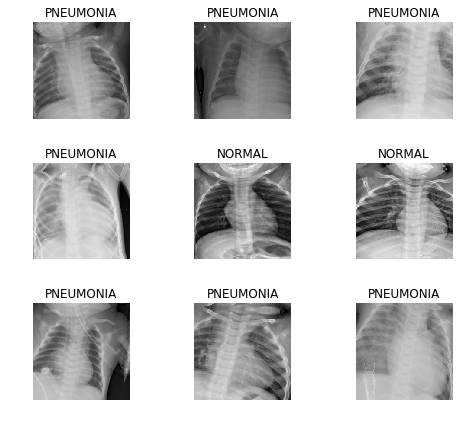

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)

['NORMAL', 'PNEUMONIA']


In [16]:
# sanity check
sum(data.valid_ds.ds.y)

AttributeError: ds

In [17]:
! ls {path/'valid'/'PNEUMONIA'} | wc -l

390


###  Training

In [18]:
doc(create_cnn)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


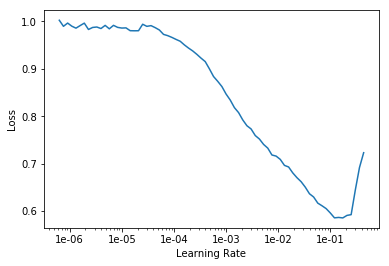

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.311376,0.350363,0.868590,01:04
1,0.147337,0.291250,0.895833,01:02
2,0.096741,0.258907,0.908654,01:03
3,0.071025,0.240649,0.911859,01:02


In [25]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5232 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /storage/data/chestxray/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /storage/data/chestxray/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(

### Interpreting results

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

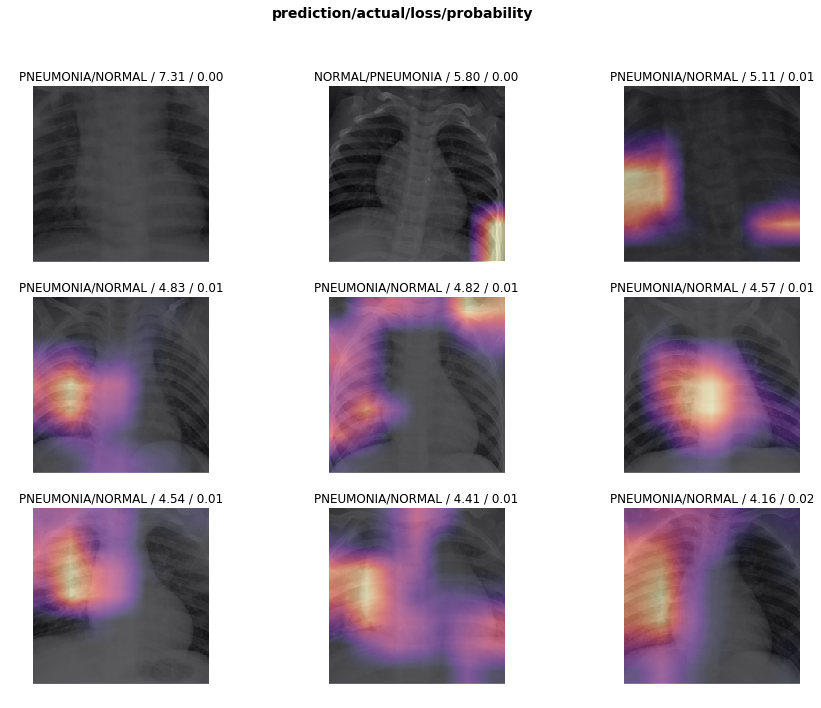

In [28]:
interp.plot_top_losses(9, figsize=(15,11))

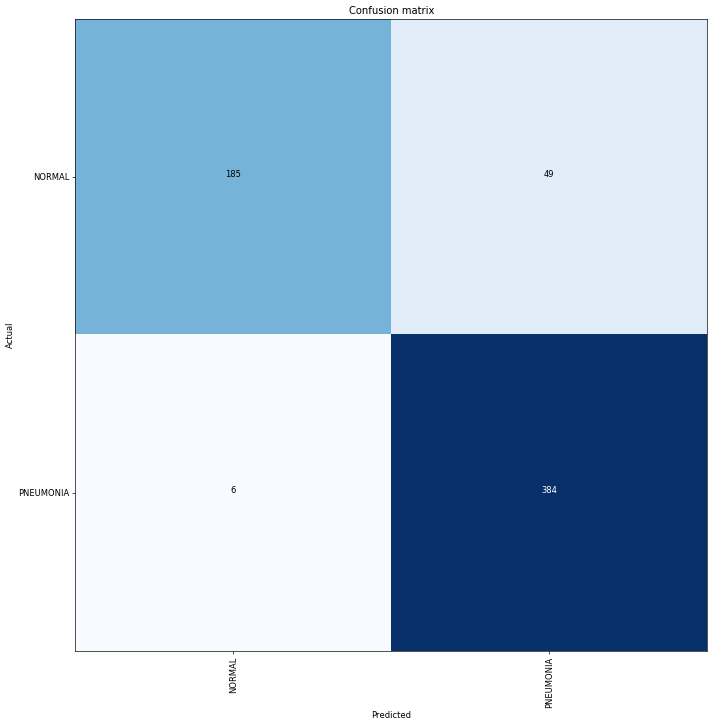

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Unfreezing, fine-tuning, and learning rates

In [30]:
learn.unfreeze()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


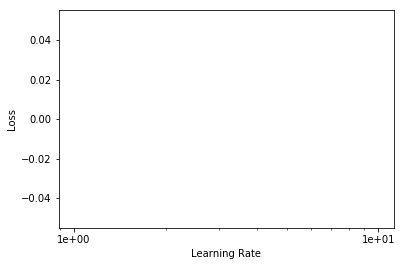

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.069507,0.259856,0.911859,00:58
1,0.062518,0.229053,0.916667,00:56


In [34]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.059681,0.240472,0.916667,00:58
1,0.062248,0.251893,0.913462,00:57


In [35]:
learn.save('stage-2')

### Training: resnet50 

In [36]:
%%time
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), size=320, bs=bs//2)
data.normalize(imagenet_stats)

CPU times: user 11 s, sys: 72 ms, total: 11.1 s
Wall time: 3.52 s


In [37]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


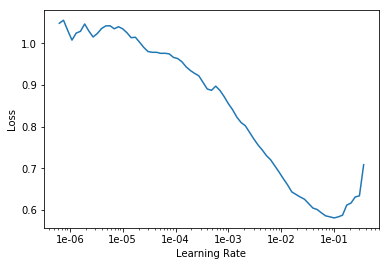

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(6, max_lr=slice(3e-3)) # TODO: decrease max_lr

epoch,train_loss,valid_loss,accuracy,time
0,0.247220,0.514296,0.849359,01:18
1,0.150903,0.334868,0.881410,01:14
2,0.133092,0.244704,0.913462,01:14
3,0.111184,0.295418,0.899038,01:13
4,0.080692,0.349752,0.895833,01:14
5,0.074618,0.285043,0.907051,01:14


In [ ]:
learn.save('stage-1-50')